In [1]:
from tensorflow.keras.models import load_model
import cv2
import os
import tensorflow as tf
import numpy as np
from deepface import DeepFace
from matplotlib import pyplot as plt

1/1 [==============================] - 0s 41ms/step
{'x': 534, 'y': 226, 'w': 786, 'h': 786}
1/1 [==============================] - 0s 15ms/step
{'x': 533, 'y': 233, 'w': 772, 'h': 772}
1/1 [==============================] - 0s 14ms/step
{'x': 528, 'y': 229, 'w': 781, 'h': 781}
1/1 [==============================] - 0s 12ms/step
{'x': 527, 'y': 224, 'w': 792, 'h': 792}
1/1 [==============================] - 0s 13ms/step
{'x': 539, 'y': 238, 'w': 773, 'h': 773}
1/1 [==============================] - 0s 13ms/step
{'x': 531, 'y': 228, 'w': 777, 'h': 777}
1/1 [==============================] - 0s 12ms/step
{'x': 530, 'y': 222, 'w': 784, 'h': 784}
1/1 [==============================] - 0s 12ms/step
{'x': 536, 'y': 233, 'w': 770, 'h': 770}
1/1 [==============================] - 0s 13ms/step
{'x': 537, 'y': 240, 'w': 759, 'h': 759}
1/1 [==============================] - 0s 12ms/step
{'x': 531, 'y': 239, 'w': 773, 'h': 773}
1/1 [==============================] - 0s 12ms/step


-1

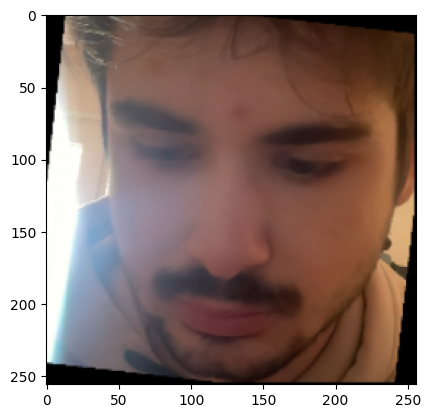

: 

In [18]:
model = load_model(os.path.join('models', 'maskmodel.h5'))
cv2.namedWindow("preview")
cv2.startWindowThread()
try:
    vc = cv2.VideoCapture(1)
except:
    vc = cv2.VideoCapture(0)

if vc.isOpened():
    rval, frame = vc.read()
else:
    rval = False

font = cv2.FONT_HERSHEY_SIMPLEX
org = (50, 50)
fontScale = 1
color = (255, 0, 0)
thickness = 2

while rval:
    coordinates = (0,0,0,0)
    try:
        faces = DeepFace.extract_faces(frame, detector_backend='opencv') 
        resize = tf.image.resize(faces[0]['face'], (256, 256)) 
        coordinates = faces[0]['facial_area']
        print(coordinates)
    except:
        resize = tf.image.resize(frame, (256, 256))

    
    yhat = model.predict(np.expand_dims(resize/255, 0))
    text = ("MASK DETECTED" if yhat < 0.2 else "NO MASK")  + " " + str(yhat)
    image = cv2.putText(frame, text, org, font, fontScale, color, thickness, cv2.LINE_AA)
    if coordinates != (0,0,0,0):
        image = cv2.rectangle(image, (coordinates["x"],coordinates["y"]), (coordinates["x"] + coordinates["w"],coordinates["y"]+coordinates["h"]), color, thickness) 

    cv2.imshow("preview", image)
    rval, frame = vc.read()
    
    key = cv2.waitKey(20)
    if key == 27:
        plt.imshow(resize)
        break


vc.release()
cv2.destroyWindow("preview")
cv2.waitKey(1)
        
